Cross-Validated Accuracy Scores: [0.93333333 1.         0.93333333 0.96666667 0.9       ]
Mean Accuracy: 0.9466666666666667


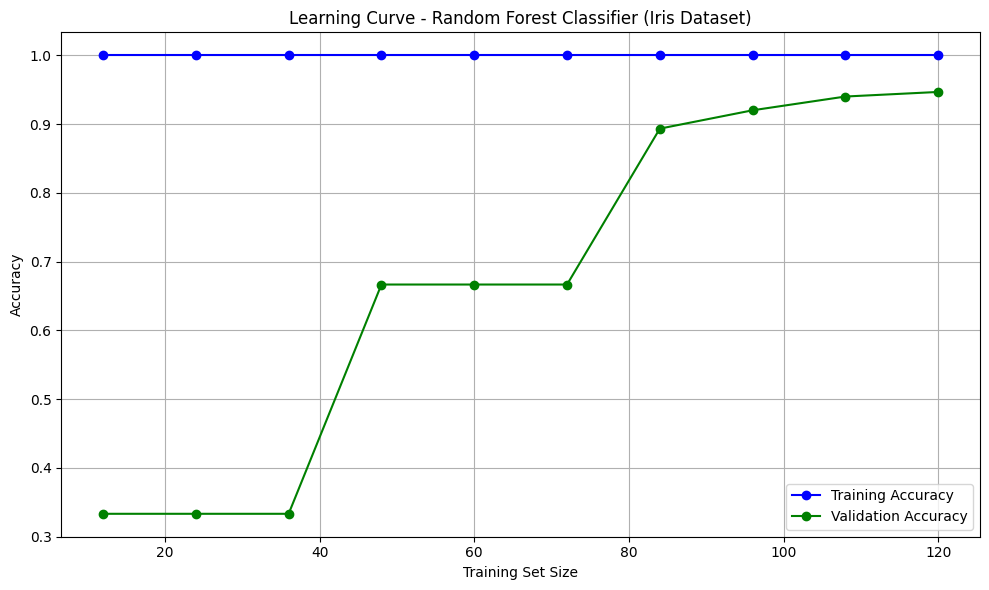

   - The model achieved cross-validated accuracy scores: [0.93333333 1.         0.93333333 0.96666667 0.9       ]
   - Mean accuracy: 0.9467

2. Learning Curve Analysis:
   - Underfitting: happens when both training and validation accuracies are low, indicating the model is too simple.
   - Overfitting: happens when training accuracy is high but validation accuracy is low, indicating the model memorizes data.

3. Random Forest Performance:
   - Random Forest handles non-linearities well and typically has low variance.
   - Overfitting can occur if parameters like n_estimators or max_depth are too high.
   - The learning curve shows how training and validation accuracies change with training set size. If the gap between curves is large, it suggests overfitting; if both are low, it suggests underfitting.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, cross_val_score, learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Loading dataset
df = pd.read_csv("/content/Iris.csv")

# Encode categorical target
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])

# Features and target
X = df.drop(['Id', 'Species'], axis=1)
y = df['Species']

# Model
model = RandomForestClassifier(n_estimators=200, random_state=42)

# KFold Cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=25)
cv_scores = cross_val_score(model, X, y, scoring='accuracy', cv=kf)

# Learning curve
train_sizes, train_scores, test_scores = learning_curve(
    model, X, y, cv=kf, scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10), random_state=25
)

print("Cross-Validated Accuracy Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

# average of the set
train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training Accuracy')
plt.plot(train_sizes, test_mean, 'o-', color='green', label='Validation Accuracy')
plt.title("Learning Curve - Random Forest Classifier (Iris Dataset)")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Discussion
print(f"   - The model achieved cross-validated accuracy scores: {cv_scores}")
print(f"   - Mean accuracy: {cv_scores.mean():.4f}")
print("\n1. Learning Curve Analysis:")
print("   - Underfitting: happens when both training and validation accuracies are low, indicating the model is too simple.")
print("   - Overfitting: happens when training accuracy is high but validation accuracy is low, indicating the model memorizes data.")
print("\n2. Random Forest Performance:")
print("   - Random Forest handles non-linearities well and typically has low variance.")
print("   - Overfitting can occur if parameters like n_estimators or max_depth are too high.")
print("   - The learning curve shows how training and validation accuracies change with training set size. If the gap between curves is large, it suggests overfitting; if both are low, it suggests underfitting.")
